# You-tube Trend Analysis : 

Team Members-
Pushkar Rajesh Patil
,Sumit Sharma,
Ekta Bhatia 


## Objective-
Our project would help users to analyze the content of videos uploaded to YouTube and would be beneficial for understanding the different categories of videos currently trending at different times. This information could help users determine the optimal time to upload their own videos, saving time and effort.


#### Importing libraries

In [1]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import json

#### Reading data 

In [2]:
df = pd.read_csv('US_youtube_trending_data.csv')

In [3]:
open_file = open('US_category_id.json')
df_category_json = json.load(open_file)

In [4]:
df.head()

video_id                                              title  \
0  3C66w5Z0ixs                 I ASKED HER TO BE MY GIRLFRIEND...   
1  M9Pmf9AB4Mo  Apex Legends | Stories from the Outlands – “Th...   
2  J78aPJ3VyNs  I left youtube for a month and THIS is what ha...   
3  kXLn3HkpjaA  XXL 2020 Freshman Class Revealed - Official An...   
4  VIUo6yapDbc  Ultimate DIY Home Movie Theater for The LaBran...   

            publishedAt                 channelId   channelTitle  categoryId  \
0  2020-08-11T19:20:14Z  UCvtRTOMP2TqYqu51xNrqAzg       Brawadis          22   
1  2020-08-11T17:00:10Z  UC0ZV6M2THA81QT9hrVWJG3A   Apex Legends          20   
2  2020-08-11T16:34:06Z  UCYzPXprvl5Y-Sf0g4vX-m6g  jacksepticeye          24   
3  2020-08-11T16:38:55Z  UCbg_UMjlHJg_19SZckaKajg            XXL          10   
4  2020-08-11T15:10:05Z  UCDVPcEbVLQgLZX0Rt6jo34A       Mr. Kate          26   

          trending_date                                               tags  \
0  2020-08-12T00:00:00Z  brawadis|prank|basketball|skits|ghost|funny vi...   
1  2020-08-12T00:00:00Z  Apex Legends|Apex Legends characters|new Apex ...   
2  2020-08-12T00:00:00Z  jacksepticeye|funny|funny meme|memes|jacksepti...   
3  2020-08-12T00:00:00Z  xxl freshman|xxl freshmen|2020 xxl freshman|20...   
4  2020-08-12T00:00:00Z  The LaBrant Family|DIY|Interior Design|Makeove...   

   view_count   likes  dislikes  comment_count  \
0     1514614  156908      5855          35313   
1     2381688  146739      2794          16549   
2     2038853  353787      2628          40221   
3      496771   23251      1856           7647   
4     1123889   45802       964           2196   

                                   thumbnail_link  comments_disabled  \
0  https://i.ytimg.com/vi/3C66w5Z0ixs/default.jpg              False   
1  https://i.ytimg.com/vi/M9Pmf9AB4Mo/default.jpg              False   
2  https://i.ytimg.com/vi/J78aPJ3VyNs/default.jpg              False   
3  https://i.ytimg.com/vi/kXLn3HkpjaA/default.jpg              False   
4  https://i.ytimg.com/vi/VIUo6yapDbc/default.jpg              False   

   ratings_disabled                                        description  
0             False  SUBSCRIBE to BRAWADIS ▶ http://bit.ly/Subscrib...  
1             False  While running her own modding shop, Ramya Pare...  
2             False  I left youtube for a month and this is what ha...  
3             False  Subscribe to XXL → http://bit.ly/subscribe-xxl...  
4             False  Transforming The LaBrant Family's empty white ...

### Data Cleaning & Pre-processing

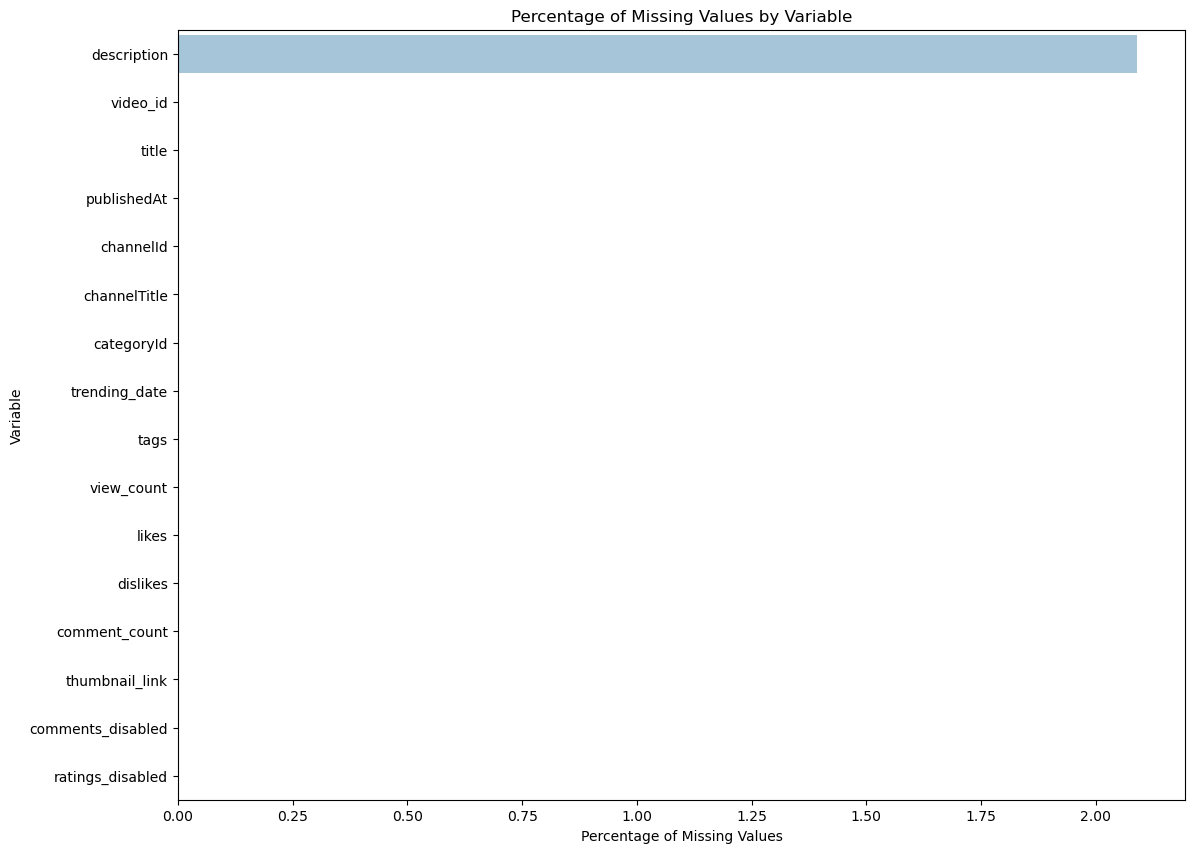

In [345]:
import matplotlib.pyplot as plt
import seaborn as sns

missing_counts = df.isnull().sum()
total_counts = df.shape[0]

missing_percents = missing_counts / total_counts * 100
missing_percents = missing_percents.sort_values(ascending=False)

fig, ax = plt.subplots(figsize=(13, 10))
sns.barplot(x=missing_percents, y=missing_percents.index, palette="Blues_d")

ax.set_xlabel("Percentage of Missing Values")
ax.set_ylabel("Variable")
ax.set_title("Percentage of Missing Values by Variable")
plt.show()

In [346]:
df.dropna(inplace = True)

In [347]:
df.head()

video_id                                              title  \
0  3C66w5Z0ixs                 I ASKED HER TO BE MY GIRLFRIEND...   
1  M9Pmf9AB4Mo  Apex Legends | Stories from the Outlands – “Th...   
2  J78aPJ3VyNs  I left youtube for a month and THIS is what ha...   
3  kXLn3HkpjaA  XXL 2020 Freshman Class Revealed - Official An...   
4  VIUo6yapDbc  Ultimate DIY Home Movie Theater for The LaBran...   

            publishedAt                 channelId   channelTitle  categoryId  \
0  2020-08-11T19:20:14Z  UCvtRTOMP2TqYqu51xNrqAzg       Brawadis          22   
1  2020-08-11T17:00:10Z  UC0ZV6M2THA81QT9hrVWJG3A   Apex Legends          20   
2  2020-08-11T16:34:06Z  UCYzPXprvl5Y-Sf0g4vX-m6g  jacksepticeye          24   
3  2020-08-11T16:38:55Z  UCbg_UMjlHJg_19SZckaKajg            XXL          10   
4  2020-08-11T15:10:05Z  UCDVPcEbVLQgLZX0Rt6jo34A       Mr. Kate          26   

          trending_date                                               tags  \
0  2020-08-12T00:00:00Z  brawadis|prank|basketball|skits|ghost|funny vi...   
1  2020-08-12T00:00:00Z  Apex Legends|Apex Legends characters|new Apex ...   
2  2020-08-12T00:00:00Z  jacksepticeye|funny|funny meme|memes|jacksepti...   
3  2020-08-12T00:00:00Z  xxl freshman|xxl freshmen|2020 xxl freshman|20...   
4  2020-08-12T00:00:00Z  The LaBrant Family|DIY|Interior Design|Makeove...   

   view_count   likes  dislikes  comment_count  \
0     1514614  156908      5855          35313   
1     2381688  146739      2794          16549   
2     2038853  353787      2628          40221   
3      496771   23251      1856           7647   
4     1123889   45802       964           2196   

                                   thumbnail_link  comments_disabled  \
0  https://i.ytimg.com/vi/3C66w5Z0ixs/default.jpg              False   
1  https://i.ytimg.com/vi/M9Pmf9AB4Mo/default.jpg              False   
2  https://i.ytimg.com/vi/J78aPJ3VyNs/default.jpg              False   
3  https://i.ytimg.com/vi/kXLn3HkpjaA/default.jpg              False   
4  https://i.ytimg.com/vi/VIUo6yapDbc/default.jpg              False   

   ratings_disabled                                        description  
0             False  SUBSCRIBE to BRAWADIS ▶ http://bit.ly/Subscrib...  
1             False  While running her own modding shop, Ramya Pare...  
2             False  I left youtube for a month and this is what ha...  
3             False  Subscribe to XXL → http://bit.ly/subscribe-xxl...  
4             False  Transforming The LaBrant Family's empty white ...

In [348]:
df.isnull().sum()

video_id             0
title                0
publishedAt          0
channelId            0
channelTitle         0
categoryId           0
trending_date        0
tags                 0
view_count           0
likes                0
dislikes             0
comment_count        0
thumbnail_link       0
comments_disabled    0
ratings_disabled     0
description          0
dtype: int64

In [349]:
titles_dict = dict()

In [350]:
titles_dict

{}

#### Reading the JSON file for catergories  

In [352]:
for i in range(len(df_category_json['items'])):
    print(df_category_json['items'][i]['id'])
    print(df_category_json['items'][i]['snippet']['title'])
    id_number = int(df_category_json['items'][i]['id'])
    category = df_category_json['items'][i]['snippet']['title']
    titles_dict[id_number] = category

1
Film & Animation
2
Autos & Vehicles
10
Music
15
Pets & Animals
17
Sports
18
Short Movies
19
Travel & Events
20
Gaming
21
Videoblogging
22
People & Blogs
23
Comedy
24
Entertainment
25
News & Politics
26
Howto & Style
27
Education
28
Science & Technology
29
Nonprofits & Activism
30
Movies
31
Anime/Animation
32
Action/Adventure
33
Classics
34
Comedy
35
Documentary
36
Drama
37
Family
38
Foreign
39
Horror
40
Sci-Fi/Fantasy
41
Thriller
42
Shorts
43
Shows
44
Trailers


## EDA

Using the datetime module to extract different date components from a column called publishedAt in a pandas DataFrame df. It is first using datetime.datetime.strptime() to parse the publishedAt strings and convert them to datetime objects. Then, it is using the .year, .month, and .day methods to extract the corresponding date components and create new columns in df for each. Additionally, it is using string slicing to extract the month, day, and year components of the publishedAt string, and create new columns for each. Specifically, it is slicing characters from position 6 to 8 for the month, from position 3 to 5 for the day, and the first two characters plus '20' for the year. The resulting new columns in df contain the extracted date components.
# On that we will be doing everything Dua-Lipa Style

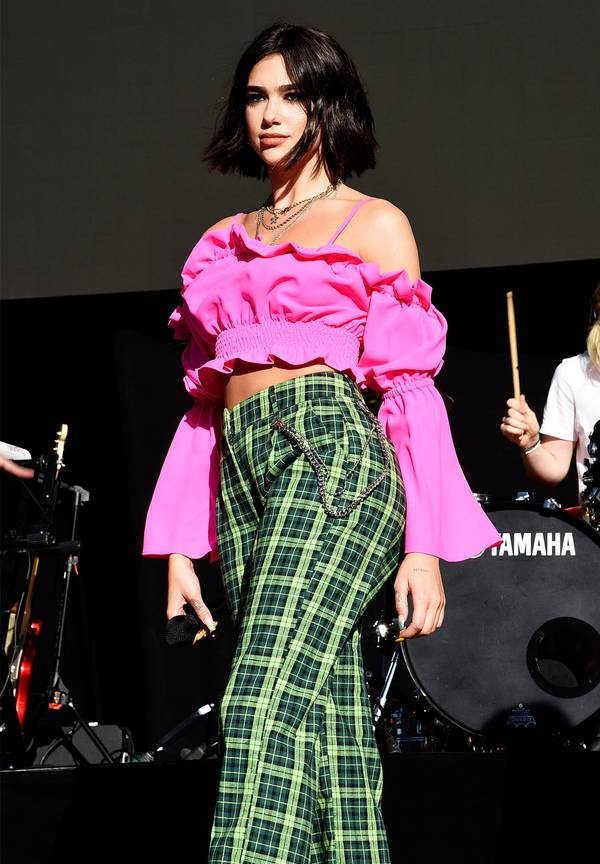

In [353]:
from IPython import display
display.Image("Dua_Lipa.jpg")

In [354]:
import datetime
datetime.datetime.strptime
df['publish_year'] = df['publishedAt'].apply(lambda x: datetime.datetime.strptime(x[: 10], '%Y-%m-%d').year)
df['publish_month'] = df['publishedAt'].apply(lambda x: datetime.datetime.strptime(x[: 10], '%Y-%m-%d').month)
df['publish_day'] = df['publishedAt'].apply(lambda x: datetime.datetime.strptime(x[: 10], '%Y-%m-%d').day)
df['trending_month'] = df['publishedAt'].apply(lambda x: x[6: 8])
df['trending_day'] = df['publishedAt'].apply(lambda x: x[3: 5])
df['trending_year'] = df['publishedAt'].apply(lambda x: '20' + x[:2])

#### We would be mapping the titles dictionary to the category in the dataframe so that we get the actual values in the output.

In [355]:
df['category'] = df['categoryId'].map(titles_dict)

In [356]:
df.head()

video_id                                              title  \
0  3C66w5Z0ixs                 I ASKED HER TO BE MY GIRLFRIEND...   
1  M9Pmf9AB4Mo  Apex Legends | Stories from the Outlands – “Th...   
2  J78aPJ3VyNs  I left youtube for a month and THIS is what ha...   
3  kXLn3HkpjaA  XXL 2020 Freshman Class Revealed - Official An...   
4  VIUo6yapDbc  Ultimate DIY Home Movie Theater for The LaBran...   

            publishedAt                 channelId   channelTitle  categoryId  \
0  2020-08-11T19:20:14Z  UCvtRTOMP2TqYqu51xNrqAzg       Brawadis          22   
1  2020-08-11T17:00:10Z  UC0ZV6M2THA81QT9hrVWJG3A   Apex Legends          20   
2  2020-08-11T16:34:06Z  UCYzPXprvl5Y-Sf0g4vX-m6g  jacksepticeye          24   
3  2020-08-11T16:38:55Z  UCbg_UMjlHJg_19SZckaKajg            XXL          10   
4  2020-08-11T15:10:05Z  UCDVPcEbVLQgLZX0Rt6jo34A       Mr. Kate          26   

          trending_date                                               tags  \
0  2020-08-12T00:00:00Z  brawadis|prank|basketball|skits|ghost|funny vi...   
1  2020-08-12T00:00:00Z  Apex Legends|Apex Legends characters|new Apex ...   
2  2020-08-12T00:00:00Z  jacksepticeye|funny|funny meme|memes|jacksepti...   
3  2020-08-12T00:00:00Z  xxl freshman|xxl freshmen|2020 xxl freshman|20...   
4  2020-08-12T00:00:00Z  The LaBrant Family|DIY|Interior Design|Makeove...   

   view_count   likes  ...  comments_disabled  ratings_disabled  \
0     1514614  156908  ...              False             False   
1     2381688  146739  ...              False             False   
2     2038853  353787  ...              False             False   
3      496771   23251  ...              False             False   
4     1123889   45802  ...              False             False   

                                         description  publish_year  \
0  SUBSCRIBE to BRAWADIS ▶ http://bit.ly/Subscrib...          2020   
1  While running her own modding shop, Ramya Pare...          2020   
2  I left youtube for a month and this is what ha...          2020   
3  Subscribe to XXL → http://bit.ly/subscribe-xxl...          2020   
4  Transforming The LaBrant Family's empty white ...          2020   

   publish_month publish_day  trending_month  trending_day  trending_year  \
0              8          11              8-            0-           2020   
1              8          11              8-            0-           2020   
2              8          11              8-            0-           2020   
3              8          11              8-            0-           2020   
4              8          11              8-            0-           2020   

         category  
0  People & Blogs  
1          Gaming  
2   Entertainment  
3           Music  
4   Howto & Style  

[5 rows x 23 columns]

In [357]:
df.drop('video_id', axis = 1, inplace = True)
df.drop('thumbnail_link', axis = 1, inplace = True)

#### We would glance at the ratings columns and see that there are two values in them. As a result, performing the analysis becomes much easier for us.

In [358]:
df['ratings_disabled'].unique()

array([False,  True])

#### New function is being created namely true_false_converter. Therefore, we are going to learn the different machine learning tools in the long term.

In [359]:
def true_false_converter(value):
    if value == True:
        return 1
    else:
        return 0

#### When we apply the function to our data, we will be replacing the old columns with new ones that only contain binary values.


In [360]:
df['comments_disabled'] = df['comments_disabled'].apply(true_false_converter)
df['ratings_disabled'] = df['ratings_disabled'].apply(true_false_converter)

In [361]:
df.tail()

title  \
197785                      LAST TO STOP EATING HOT WINGS   
197786     Finally... the next chapter! | Caroline Girvan   
197787  Mini-Movie: Lakers Take Game 1 in Memphis | 20...   
197788                    How to Survive* a Nuclear Blast   
197789  6ix9ine - WAPAE feat. feat. Angel Dior, Lenier...   

                 publishedAt                 channelId        channelTitle  \
197785  2023-04-17T16:26:40Z  UCxOzbkk0bdVl6-tH1Fcajfg          Beta Squad   
197786  2023-04-17T17:08:05Z  UCpis3RcTw6t47XO0R_KY4WQ     Caroline Girvan   
197787  2023-04-18T00:57:10Z  UC8CSt-oVqy8pUAoKSApTxQw  Los Angeles Lakers   
197788  2023-04-17T17:00:19Z  UCFbtcTaMFnOAP0pFO1L8hVw           Kyle Hill   
197789  2023-04-15T19:00:17Z  UCF6jRAgCbSanHolKt0Vt6Qw     Tekashi 6ix9ine   

        categoryId         trending_date  \
197785          24  2023-04-23T00:00:00Z   
197786          17  2023-04-23T00:00:00Z   
197787          17  2023-04-23T00:00:00Z   
197788          28  2023-04-23T00:00:00Z   
197789          10  2023-04-23T00:00:00Z   

                                                     tags  view_count   likes  \
197785  beta squad|hot ones|hot wing challenge|hot sau...     3265358  126976   
197786  caroline girvan|cgx|cgx app|caroline girvan ap...      360131   26125   
197787  Lakers|NBA|Basketball|Los Angeles|Showtime|Lak...      272965    7682   
197788  because science|engineering|kyle hill|learning...      435899   32244   
197789                                             [None]     8720178  593205   

        dislikes  ...  comments_disabled  ratings_disabled  \
197785         0  ...                  0                 0   
197786         0  ...                  0                 0   
197787         0  ...                  0                 0   
197788         0  ...                  0                 0   
197789         0  ...                  0                 0   

                                              description publish_year  \
197785  Today we take on the challenge of eating incre...         2023   
197786  Hello everyone! I hope you are all doing great...         2023   
197787  Subscribe for the latest Lakers' content: http...         2023   
197788  Go to https://80000hours.org/kylehill to find ...         2023   
197789  WAPAE OUT NOWSTREAM / DOWNLOAD: http://69.lnk....         2023   

        publish_month  publish_day  trending_month trending_day trending_year  \
197785              4           17              4-           3-          2020   
197786              4           17              4-           3-          2020   
197787              4           18              4-           3-          2020   
197788              4           17              4-           3-          2020   
197789              4           15              4-           3-          2020   

                    category  
197785         Entertainment  
197786                Sports  
197787                Sports  
197788  Science & Technology  
197789                 Music  

[5 rows x 21 columns]

The code is using the plotly.express library to create a box plot of the view_count column in a pandas DataFrame df. The px.box() function is used to create the box plot, with the x argument specifying the column to use for the x-axis. The resulting plot shows the distribution of values for the view_count column, including the median, quartiles, and any outliers.

In [430]:
import plotly.express as px
px.box(df,x="view_count")

## Countplot of Different Categories

The resulting plot shows the frequency distribution of the category values in the DataFrame.

C:\Users\pushk\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



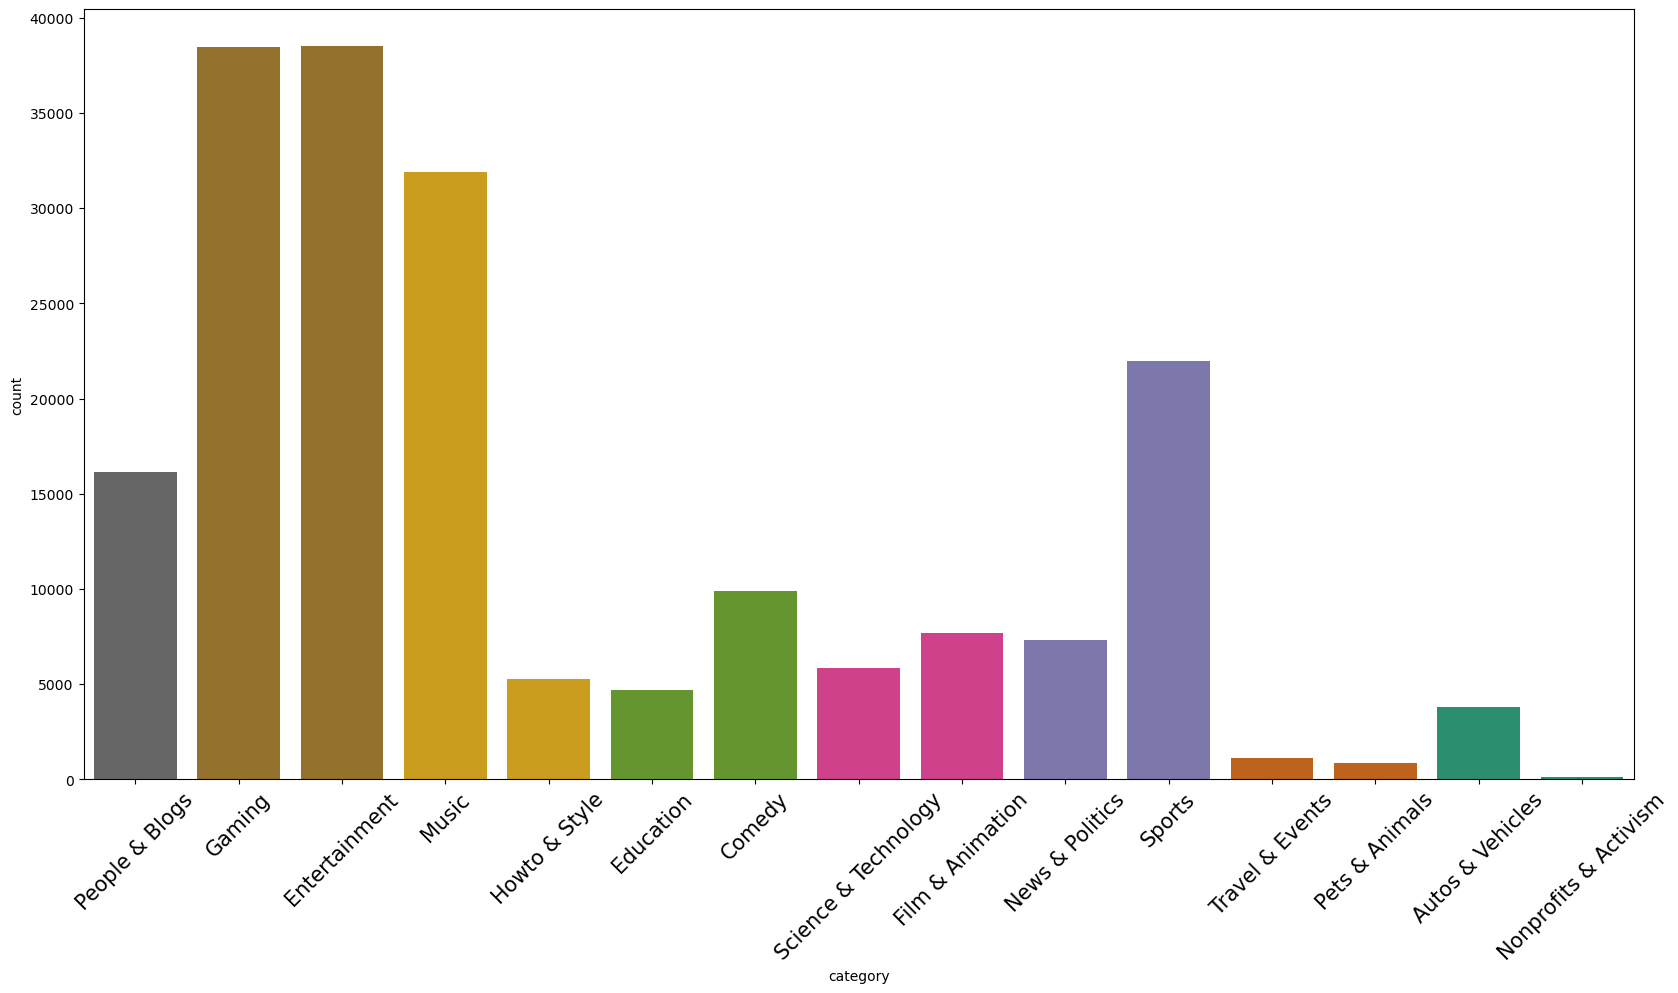

In [363]:
plt.figure(figsize = (20, 10))
plt.xticks(rotation = 45, fontsize = 15)
sns.countplot(df['category'], palette = 'Dark2_r')
plt.show()

The resulting plot shows the frequency distribution of the comments_disabled values in the DataFrame.

<AxesSubplot:xlabel='comments_disabled', ylabel='count'>

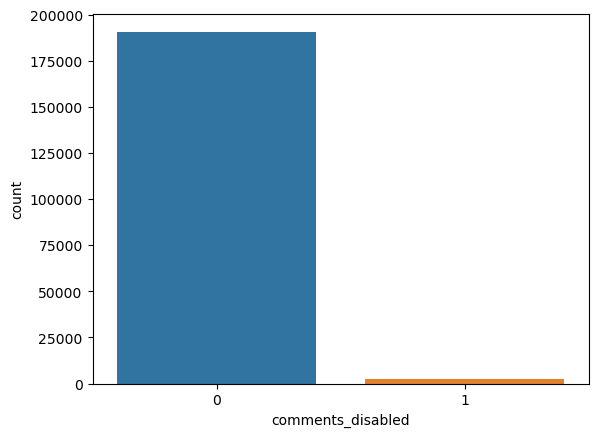

In [364]:
sns.countplot(x = 'comments_disabled', data = df)

## Grouping Average Views Based on Category

Looking at average likes, we can observe that music videos have the most. Other videos, such as comedy and movies, do not garner as many likes as musical ones. Other video categories, such as "News & Politics" and "Shows," do not earn as many likes as the other video categories.


<AxesSubplot:xlabel='category'>

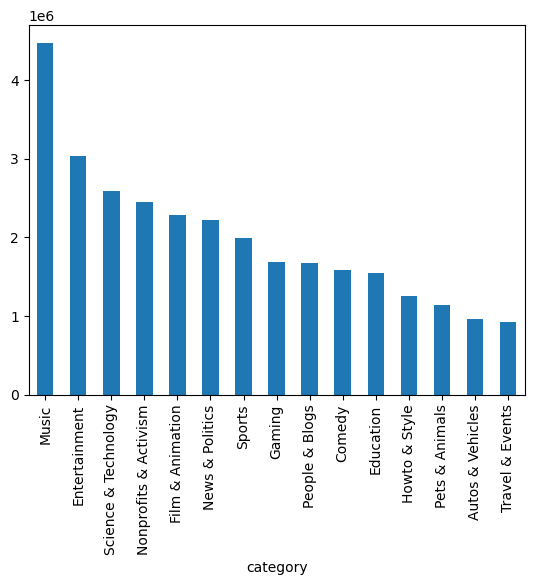

In [365]:
df.groupby('category').mean()['view_count'].sort_values(ascending = False).plot.bar()

### Grouping Comments Based on Categories


Looking at the different categories, we see that the average comment count is the highest again for the music videos. However, the "shows" category does not contain a lot of values present in them. We see that a lot of values that are present are the "Music" videos and the lowest number of vidoes are "Shows" categories respectively. In addition to this, we see that "Travel & Events" contain the second lowest average comments count respectively.

<AxesSubplot:xlabel='category'>

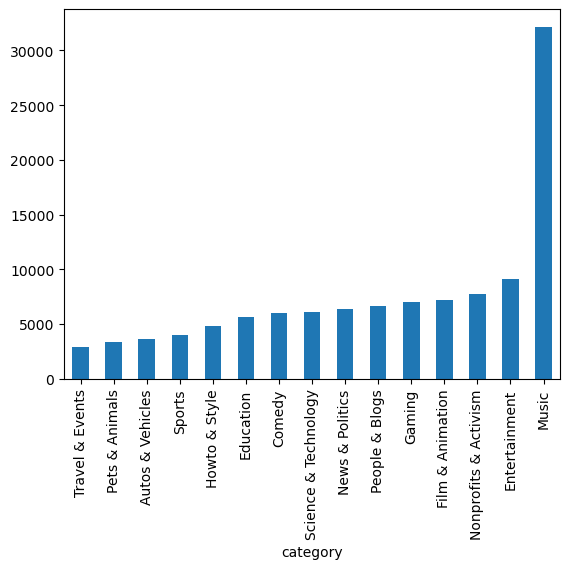

In [366]:
df.groupby('category').mean()['comment_count'].sort_values().plot.bar()

In [367]:
df.head()


title           publishedAt  \
0                 I ASKED HER TO BE MY GIRLFRIEND...  2020-08-11T19:20:14Z   
1  Apex Legends | Stories from the Outlands – “Th...  2020-08-11T17:00:10Z   
2  I left youtube for a month and THIS is what ha...  2020-08-11T16:34:06Z   
3  XXL 2020 Freshman Class Revealed - Official An...  2020-08-11T16:38:55Z   
4  Ultimate DIY Home Movie Theater for The LaBran...  2020-08-11T15:10:05Z   

                  channelId   channelTitle  categoryId         trending_date  \
0  UCvtRTOMP2TqYqu51xNrqAzg       Brawadis          22  2020-08-12T00:00:00Z   
1  UC0ZV6M2THA81QT9hrVWJG3A   Apex Legends          20  2020-08-12T00:00:00Z   
2  UCYzPXprvl5Y-Sf0g4vX-m6g  jacksepticeye          24  2020-08-12T00:00:00Z   
3  UCbg_UMjlHJg_19SZckaKajg            XXL          10  2020-08-12T00:00:00Z   
4  UCDVPcEbVLQgLZX0Rt6jo34A       Mr. Kate          26  2020-08-12T00:00:00Z   

                                                tags  view_count   likes  \
0  brawadis|prank|basketball|skits|ghost|funny vi...     1514614  156908   
1  Apex Legends|Apex Legends characters|new Apex ...     2381688  146739   
2  jacksepticeye|funny|funny meme|memes|jacksepti...     2038853  353787   
3  xxl freshman|xxl freshmen|2020 xxl freshman|20...      496771   23251   
4  The LaBrant Family|DIY|Interior Design|Makeove...     1123889   45802   

   dislikes  ...  comments_disabled  ratings_disabled  \
0      5855  ...                  0                 0   
1      2794  ...                  0                 0   
2      2628  ...                  0                 0   
3      1856  ...                  0                 0   
4       964  ...                  0                 0   

                                         description publish_year  \
0  SUBSCRIBE to BRAWADIS ▶ http://bit.ly/Subscrib...         2020   
1  While running her own modding shop, Ramya Pare...         2020   
2  I left youtube for a month and this is what ha...         2020   
3  Subscribe to XXL → http://bit.ly/subscribe-xxl...         2020   
4  Transforming The LaBrant Family's empty white ...         2020   

   publish_month  publish_day  trending_month trending_day trending_year  \
0              8           11              8-           0-          2020   
1              8           11              8-           0-          2020   
2              8           11              8-           0-          2020   
3              8           11              8-           0-          2020   
4              8           11              8-           0-          2020   

         category  
0  People & Blogs  
1          Gaming  
2   Entertainment  
3           Music  
4   Howto & Style  

[5 rows x 21 columns]

### Grouping Channels Based on Channel Title


Now it is time to understand the channel titles that are present in our data respectively. We see from the data that most of the channels are from SET India followed by MSNBC. Looking at the graph below, one can tell that there is not a significant difference between the frequently occurring channels in the data respectively.

<AxesSubplot:ylabel='channelId'>

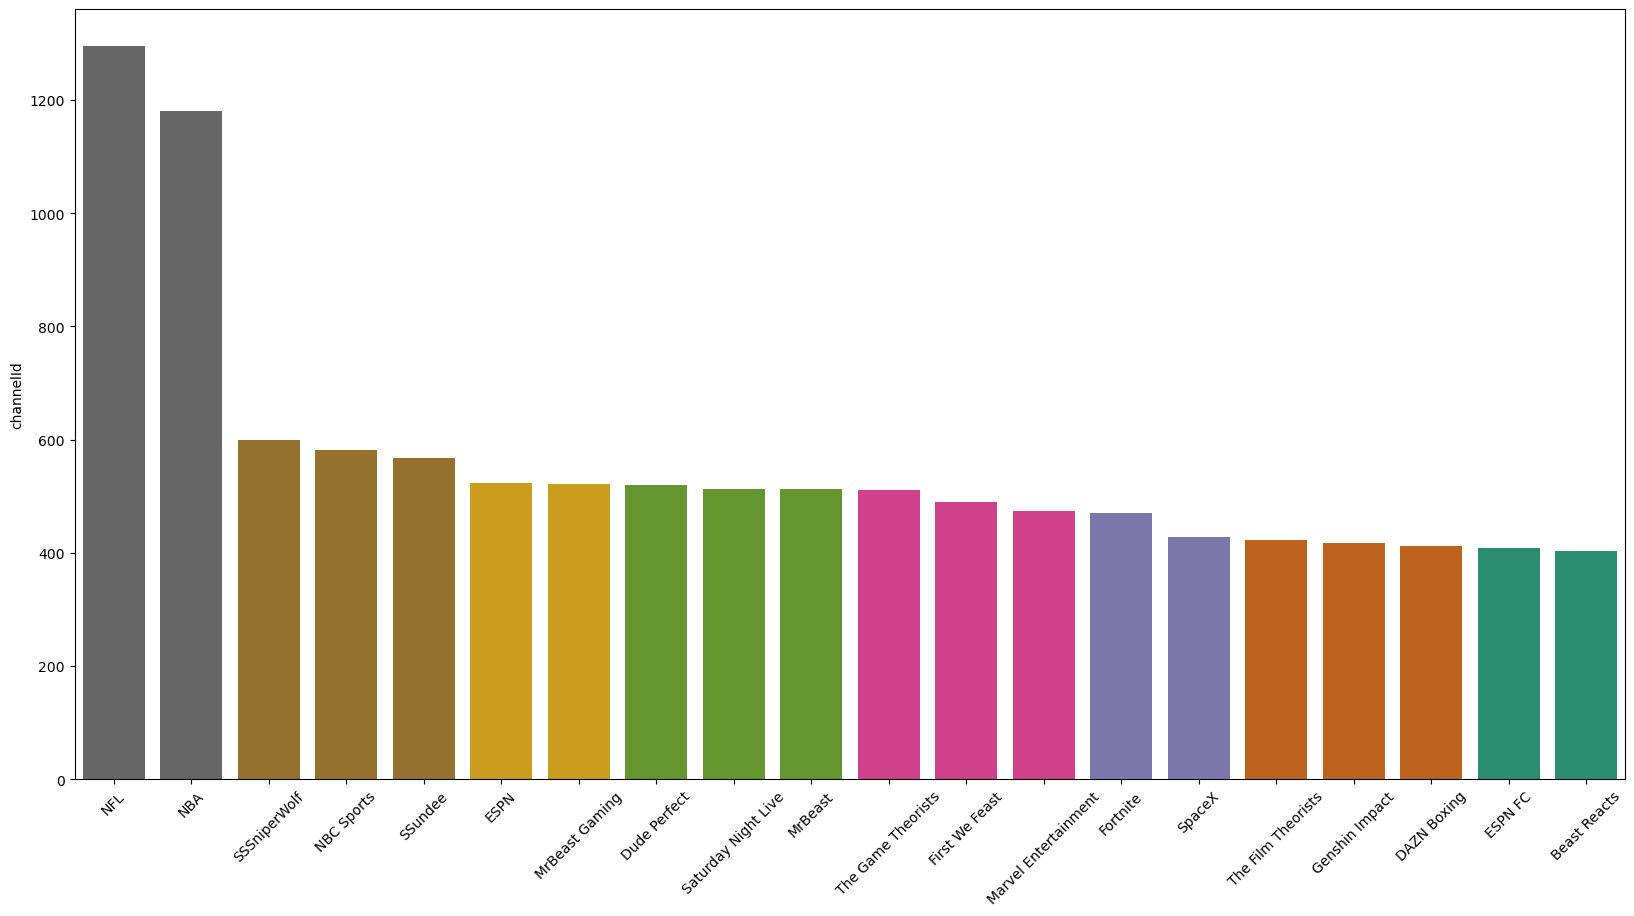

In [368]:
plt.figure(figsize = (20, 10))
plt.xticks(rotation = 45)
sns.barplot(x = df['channelTitle'].value_counts()[: 20].index, y = df['channelId'].value_counts()[: 20], palette = 'Dark2_r')

### Countplot of Trending Month


Now comes the time to apply the countplot and count the total number of videos that are present for different months that are trending. Looking at the data, we can say that there are quite a less number of videos that are trending on 'June' and 'November'. The highest trending month where the videos are trending are on months 'March' and 'May' respectively.

In [369]:
df['trending_date']

0         2020-08-12T00:00:00Z
1         2020-08-12T00:00:00Z
2         2020-08-12T00:00:00Z
3         2020-08-12T00:00:00Z
4         2020-08-12T00:00:00Z
                  ...         
197785    2023-04-23T00:00:00Z
197786    2023-04-23T00:00:00Z
197787    2023-04-23T00:00:00Z
197788    2023-04-23T00:00:00Z
197789    2023-04-23T00:00:00Z
Name: trending_date, Length: 193655, dtype: object

C:\Users\pushk\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



<AxesSubplot:xlabel='trending_month', ylabel='count'>

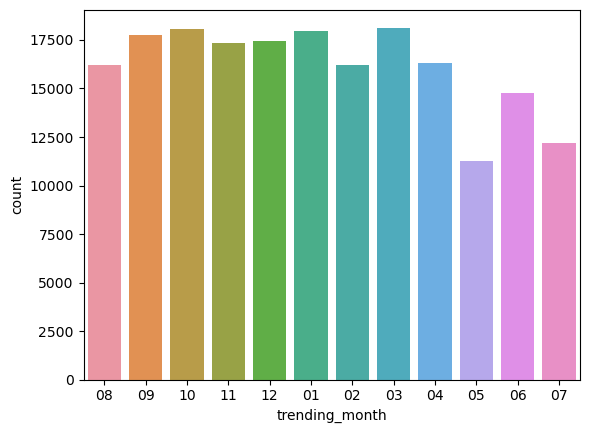

In [370]:
df['trending_month'] = df['trending_date'].apply(lambda x: x[5: 7])
sns.countplot(df['trending_month'])

### Countplot of Upload Time for Trending Videos

Now we apply the countplot and count the total number of trending videos with their upload time of the day.

In [371]:
df_published_time = df['publishedAt'].apply(lambda x: x[11: 13]).astype(int)
df_published_time

0         19
1         17
2         16
3         16
4         15
          ..
197785    16
197786    17
197787     0
197788    17
197789    19
Name: publishedAt, Length: 193655, dtype: int32

C:\Users\pushk\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



<AxesSubplot:xlabel='publishedAt', ylabel='count'>

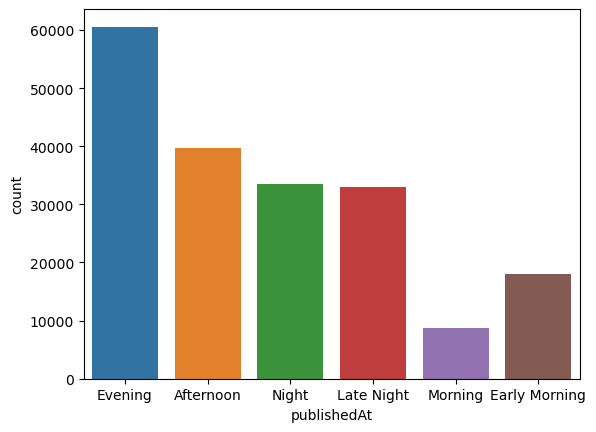

In [372]:
df_published_time_interval = df_published_time.apply(lambda y: "Early Morning" if y in range(4,8) else "Morning" if y in range(8,12) else "Afternoon" if y in range(12,16) else "Evening" if y in range(16,20) else "Night" if y in range(20,23) else "Late Night")
sns.countplot(df_published_time_interval)

### Scatterplot of Title Length Vs Views

Taking a countplot between views and title length, one would be able to understand from the below visualization that most of the views where for the videos where the title length is abotu 40 - 60 words. In addition to this, we also see that as the title length keeps increasing, the number of views keep slowing decreasing as can be seen from the below trend. Therefore, we were able to infer this by creating new features and understanding them fully.

<AxesSubplot:xlabel='view_count', ylabel='title_length'>

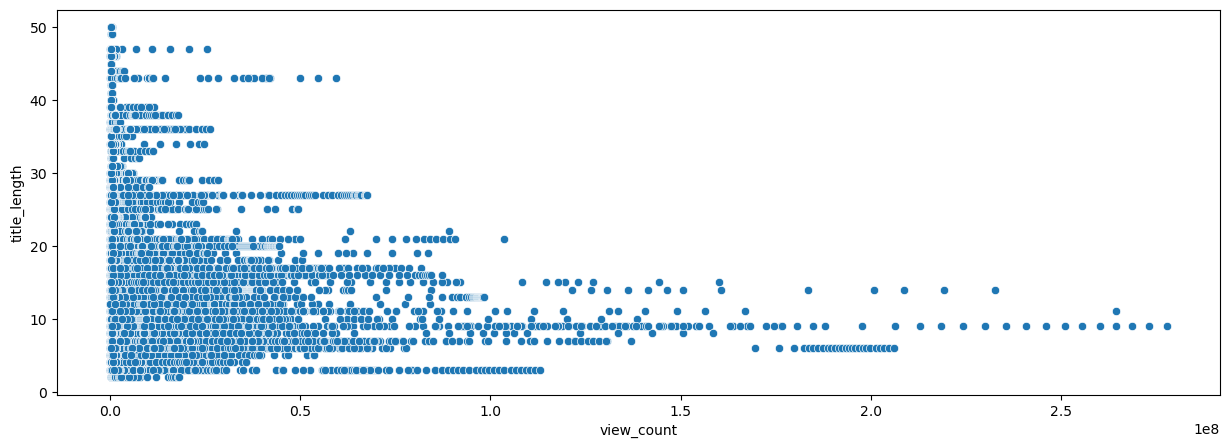

In [373]:
df['title_length'] = df['channelTitle'].apply(lambda x: len(x))
plt.figure(figsize = (15, 5))
sns.scatterplot(x = 'view_count', y = 'title_length', data = df)

### Scatterplot of Title Length Vs Likes

<AxesSubplot:xlabel='likes', ylabel='title_length'>

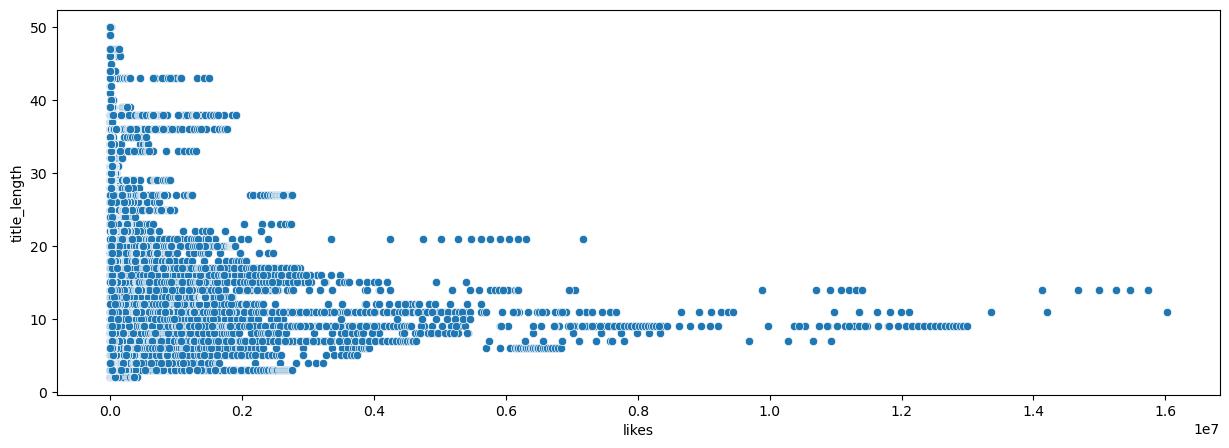

In [374]:
plt.figure(figsize = (15, 5))
sns.scatterplot(x = 'likes', y = 'title_length', data = df)

In [375]:
df.drop(['trending_date', 'publishedAt'], axis = 1, inplace = True)

The resulting plot shows the pairwise relationships between the selected columns, including the distribution of each column and the correlation between them, with different colors indicating the different categories.

<Figure size 1500x1500 with 0 Axes>

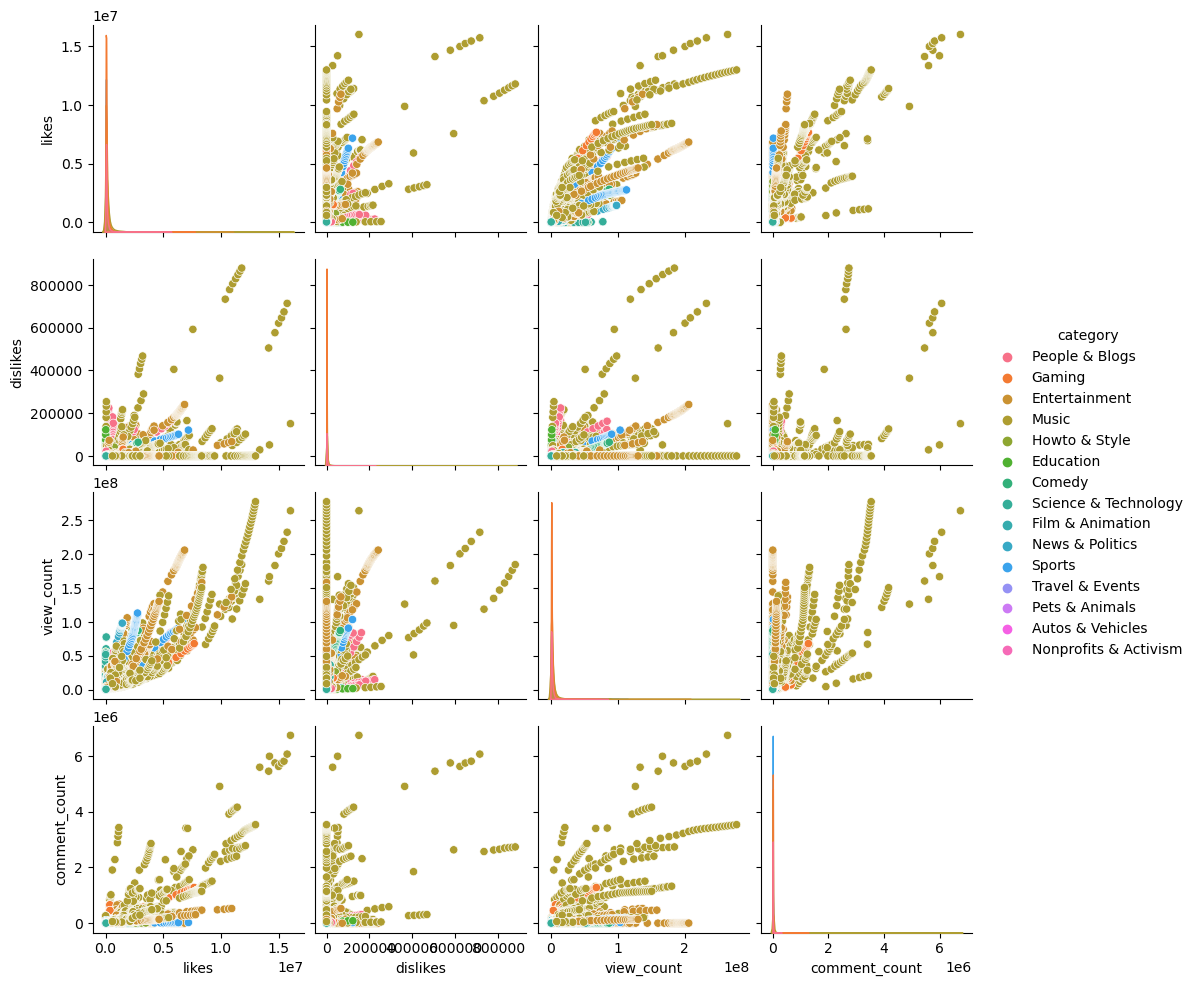

In [376]:
cols=["likes","dislikes","view_count","comment_count","category"]
plt.figure(figsize=(15,15))
sns.pairplot(df[cols],diag_kind="kde",hue="category",palette="husl")

### Countplot of Comments Disabled Videos

Looking at different videos where the comments were disabled, we see that most of the comments were disabled for Entertainment type videos followed by News & Politics video category. The least amount of videos that were disabled were from Gaming and Autos & Vehicles respectively.

C:\Users\pushk\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



<AxesSubplot:xlabel='category', ylabel='count'>

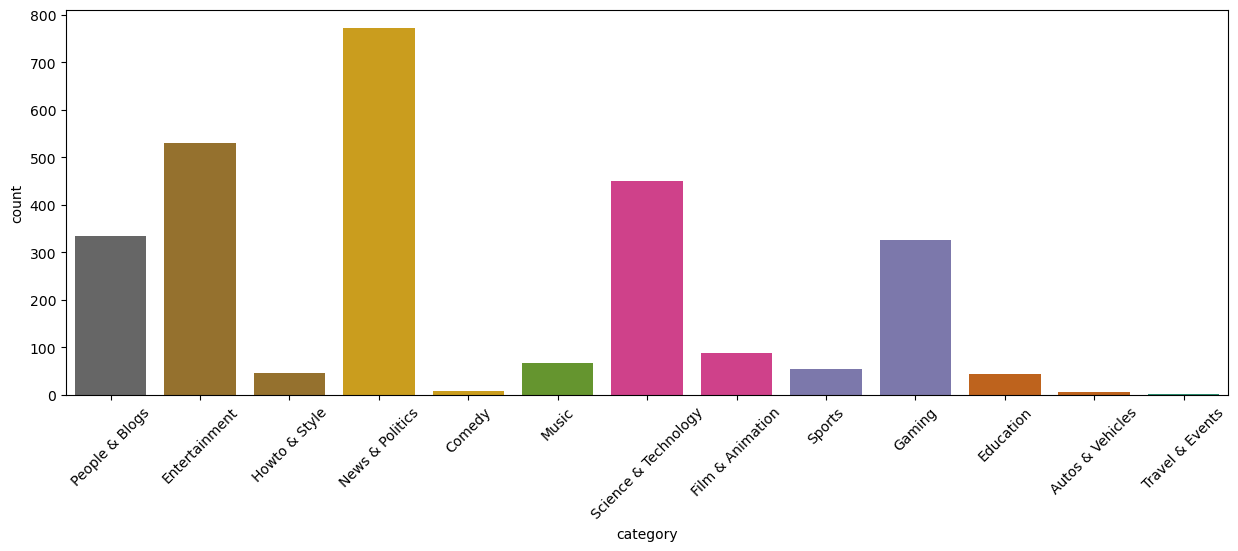

In [377]:
plt.figure(figsize = (15, 5))
plt.xticks(rotation = 45)
sns.countplot(df[df['comments_disabled'] == 1]['category'], palette = 'Dark2_r')

In [378]:
month_mapping = {1: 'January', 2: 'February', 3: 'March',4: 'April',5: 'May',6: 'June',7: 'July',8:'August',
                 9: 'September', 10: 'October',
                 11: 'November', 12: 'December'}

In [379]:
df['description_length'] = df['description'].apply(lambda x: len(x))

In [380]:
df.head()

title  \
0                 I ASKED HER TO BE MY GIRLFRIEND...   
1  Apex Legends | Stories from the Outlands – “Th...   
2  I left youtube for a month and THIS is what ha...   
3  XXL 2020 Freshman Class Revealed - Official An...   
4  Ultimate DIY Home Movie Theater for The LaBran...   

                  channelId   channelTitle  categoryId  \
0  UCvtRTOMP2TqYqu51xNrqAzg       Brawadis          22   
1  UC0ZV6M2THA81QT9hrVWJG3A   Apex Legends          20   
2  UCYzPXprvl5Y-Sf0g4vX-m6g  jacksepticeye          24   
3  UCbg_UMjlHJg_19SZckaKajg            XXL          10   
4  UCDVPcEbVLQgLZX0Rt6jo34A       Mr. Kate          26   

                                                tags  view_count   likes  \
0  brawadis|prank|basketball|skits|ghost|funny vi...     1514614  156908   
1  Apex Legends|Apex Legends characters|new Apex ...     2381688  146739   
2  jacksepticeye|funny|funny meme|memes|jacksepti...     2038853  353787   
3  xxl freshman|xxl freshmen|2020 xxl freshman|20...      496771   23251   
4  The LaBrant Family|DIY|Interior Design|Makeove...     1123889   45802   

   dislikes  comment_count  comments_disabled  ...  \
0      5855          35313                  0  ...   
1      2794          16549                  0  ...   
2      2628          40221                  0  ...   
3      1856           7647                  0  ...   
4       964           2196                  0  ...   

                                         description publish_year  \
0  SUBSCRIBE to BRAWADIS ▶ http://bit.ly/Subscrib...         2020   
1  While running her own modding shop, Ramya Pare...         2020   
2  I left youtube for a month and this is what ha...         2020   
3  Subscribe to XXL → http://bit.ly/subscribe-xxl...         2020   
4  Transforming The LaBrant Family's empty white ...         2020   

   publish_month  publish_day  trending_month trending_day trending_year  \
0              8           11              08           0-          2020   
1              8           11              08           0-          2020   
2              8           11              08           0-          2020   
3              8           11              08           0-          2020   
4              8           11              08           0-          2020   

         category title_length  description_length  
0  People & Blogs            8                 361  
1          Gaming           12                 715  
2   Entertainment           13                 513  
3           Music            3                 762  
4   Howto & Style            8                2493  

[5 rows x 21 columns]

In [381]:
corr_df = df[['view_count', 'likes', 'dislikes', 'comment_count', 
              'trending_year', 'trending_day', 'trending_month', 'title_length', 'publish_year', 
                  'publish_month', 'publish_day', 'description_length']].corr()

### Heatmap of Correlation Matrix

We have plotted a heatmap of the correlation matrix so that we understand the relationships between different features in our data respectively. We see that there is a high correlation between likes and views. In addition, there is also a positive relationship between likes and comment_count. In addition to this, looks like there are very low correlation values present in our data respectively.

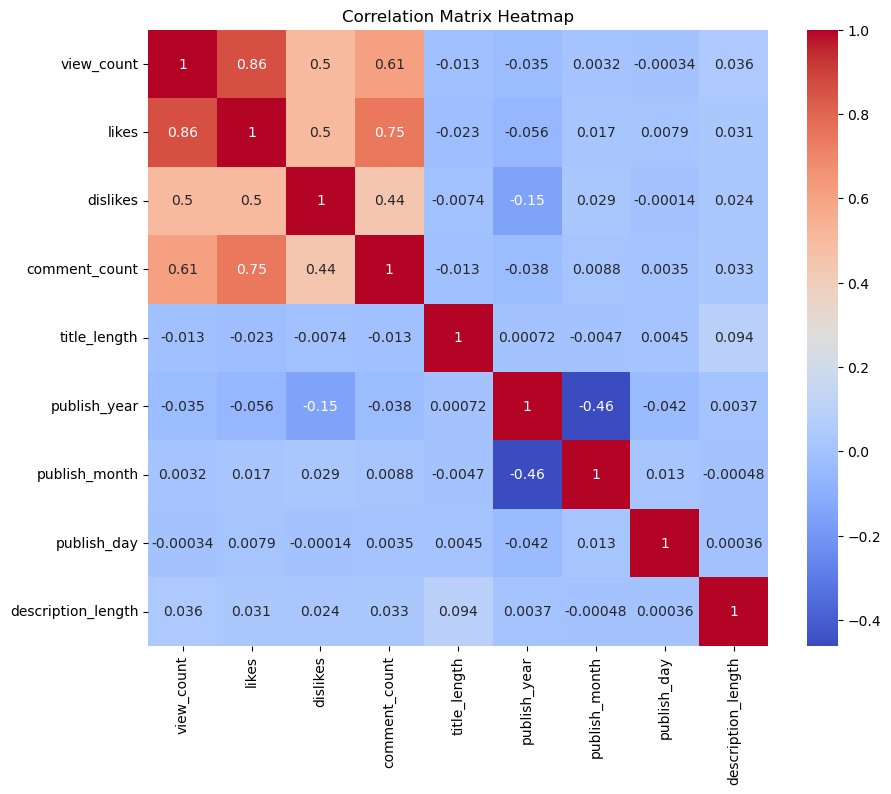

In [382]:
plt.figure(figsize=(10, 8))
sns.heatmap(corr_df, cmap='coolwarm', annot=True)
plt.title('Correlation Matrix Heatmap')
plt.show()

## Scatterplot of Likes Vs Comments Count

Let us see based on the heatmap above the relationship between comment count and likes in our data. We see from the below scatterplot that there is a positive relationship between the values. As the comment_count increases, there is a possibility for the likes to increase respectively. But we have to also see that correlation need not always be equal to causation. Therefore, we cannot assume that having a high comment_count would cause the videos to have more likes and vice-versa respectively.

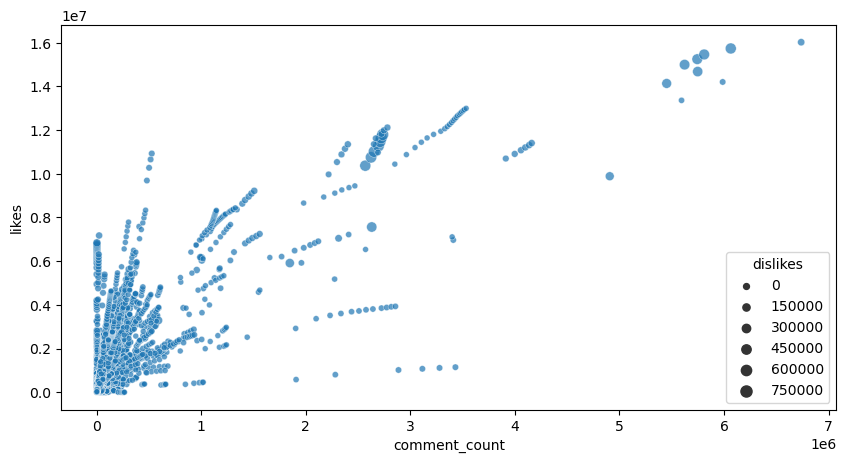

In [383]:
plt.figure(figsize = (10, 5))
sns.scatterplot(x = 'comment_count', y = 'likes', size = df['dislikes'], alpha = 0.7, data = df)
plt.show()

## Training and Testing ML Models

###### View count of a YouTube video based on several features such as the category of the video, the number of likes, dislikes, comments, the length of the video's description, and title.

In [384]:
x = df[['categoryId','likes','dislikes','comment_count','description_length','title_length']] # menggunakan semua feature kecuali target
y = df['view_count']

In [385]:
from sklearn.model_selection import train_test_split
xtrain, xtest, ytrain, ytest = train_test_split(x,y,test_size=0.2, random_state=42) #Splitting the data into Train and Test

By training a machine learning model on this data, you can build a predictive model that can accurately predict the view count of a YouTube video based on its features. This can be useful for content creators to understand how to optimize their videos for maximum visibility and engagement, and for advertisers to identify high-performing videos for their campaigns.

### LinearRegression

In [386]:
#Fitting simple linear regression to the Training Set
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(xtrain, ytrain)

LinearRegression()

In [387]:
pred = regressor.predict(xtest) #Predicting the views

In [388]:
np.exp(pred).round() # inverse log transform

C:\Users\pushk\AppData\Local\Temp\ipykernel_19996\2850986948.py:1: RuntimeWarning:

overflow encountered in exp



array([inf, inf, inf, ..., inf, inf, inf])

In [389]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
def eval_regression(model, pred, xtrain, ytrain, xtest, ytest):
    print("MAE: %.2f" % mean_absolute_error(ytest, pred)) # The MAE
    print("RMSE: %.2f" % mean_squared_error(ytest, pred, squared=False)) # The RMSE
    print('R2 score: %.2f' % r2_score(ytest, pred)) # Explained variance score: 1 is perfect prediction

In [390]:
pred = regressor.predict(xtest)

print('Coefficients: \n', regressor.coef_) # The slope

eval_regression(regressor, pred, xtrain, ytrain, xtest,ytest)

Coefficients: 
 [ 1.12636757e+04  1.50169481e+01  9.08792491e+01 -7.98826020e+00
  8.08199485e+01  7.90168764e+03]
MAE: 1244795.90
RMSE: 3834187.08
R2 score: 0.75


### DecisionTreeRegressor

In [391]:
from sklearn.tree import DecisionTreeRegressor

dt = DecisionTreeRegressor()
dt.fit(xtrain, ytrain)
new_data = [[10,23250,1856,7647,762,3]]
pred = dt.predict(xtest)
eval_regression(dt, pred, xtrain, ytrain, xtest, ytest)


MAE: 561727.81
RMSE: 1809835.31
R2 score: 0.94


### RandomForestRegressor

In [392]:
from sklearn.ensemble import RandomForestRegressor

rf = RandomForestRegressor(random_state=104)
best_model1 = rf.fit(xtrain, ytrain)
pred = rf.predict(xtest)
eval_regression(rf, pred, xtrain, ytrain, xtest, ytest)


MAE: 474925.47
RMSE: 1330006.97
R2 score: 0.97


In [393]:
!pip install xgboost

### Simple XGBoostRegressor

In [394]:
from xgboost import XGBRegressor

In [395]:
xgb = XGBRegressor()
xgb.fit(xtrain, ytrain)       # Fitting model with x_train and y_train
xgb_pred = xgb.predict(xtrain)  # Predicting the results
print('RMSE:', np.sqrt(mean_squared_error( ytrain, xgb_pred, squared=False)))
print('r2 score: %.2f' % r2_score(ytrain, xgb_pred))
print("Accuracy :",xgb.score(xtrain, ytrain))

RMSE: 1187.8774378692221
r2 score: 0.96
Accuracy : 0.958030243674561


### Tuning XGBoostRegressor

In [413]:
xgb = XGBRegressor(n_estimators=5000, learning_rate=0.001)
xgb.fit(xtrain, ytrain)       # Fitting model with x_train and y_train
xgb_pred = xgb.predict(xtrain)  # Predicting the results
print('RMSE:', np.sqrt(mean_squared_error(ytrain, xgb_pred, squared=False)))
print('r2 score: %.2f' % r2_score(ytrain, xgb_pred))
print("Accuracy :",xgb.score(xtrain, ytrain))

RMSE: 1413.8974057978576
r2 score: 0.92
Accuracy : 0.9157593898027442


Based on the experiments that have been carried out, there are several models that are good for determining the views of Youtube videos 

Decision Tree with R2 of 0.97 makes Random Forest the best model so far
Random Forest is the second best sequence model after Random Forest with a slightly smaller R2 value of 0.96
a very influential feature is the number of likes and dislikes of a video


### Overall, the code demonstrates the process of training a decision tree regression model, saving it to a file, loading it back into memory, making predictions with it, and evaluating its accuracy on new and existing data.

In [414]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import accuracy_score
import joblib
dt = DecisionTreeRegressor()
dt.fit(xtrain, ytrain)

# Save the model to a file
joblib.dump(dt, 'decision_tree_regression_model.pkl')

# Load the model from the file
dt_loaded = joblib.load('decision_tree_regression_model.pkl')
new_data = [[10, 23250, 1856, 7647, 762, 3]]
pred = dt_loaded.predict(new_data)
print(pred)

# Evaluate the model
acc_train = dt_loaded.score(xtrain, ytrain)
acc_test = dt_loaded.score(xtest, ytest)
print(pred)

acc_train = dt_loaded.score(xtrain, ytrain)
acc_test = dt_loaded.score(xtest, ytest)
print("Accuracy on training data: ", acc_train)
print("Accuracy on test data: ", acc_test)

##Original value is 496771

[496771.]
[496771.]
Accuracy on training data:  0.9998373472196258
Accuracy on test data:  0.9427308294286632


C:\Users\pushk\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning:

X does not have valid feature names, but DecisionTreeRegressor was fitted with feature names



## Testing Hypothesis using T Test

Here we test the null hypothesis that there no significant difference in the mean views between the two most viewed categories, Music and Entertainment.

This can be written as:

H0: μ1 = μ2

where μ1 is the mean number of views for category 10 (Music), and μ2 is the mean number of views for category 24 (Entertainment). If we reject the null hypothesis, it means that we have evidence to suggest that there is a significant difference in the mean views between the two categories.

In [6]:
import scipy.stats as stats
category_10 = df[df['categoryId'] == 10]['view_count']
category_24 = df[df['categoryId'] == 24]['view_count']

# Calculate the mean and standard deviation of the views for each group
mean_category_10, std_category_10 = category_10.mean(), category_10.std()
mean_category_24, std_category_24 = category_24.mean(), category_24.std()

# Perform a two-sample t-test to compare the means of the two groups
t_stat, p_val = stats.ttest_ind(category_10, category_24, equal_var=False)

# Interpret the results of the test and draw conclusions
alpha = 0.05
if p_val < alpha:
    print(f"The p-value ({p_val}) is less than the significance level ({alpha}), so we reject the null hypothesis and conclude that there is a significant difference in the means of views for categories 10 and 24.")
else:
    print(f"The p-value ({p_val}) is greater than the significance level ({alpha}), so we fail to reject the null hypothesis and conclude that there is no significant difference in the means of views for categories 10 and 24.")

The p-value (1.6674428138097077e-65) is less than the significance level (0.05), so we reject the null hypothesis and conclude that there is a significant difference in the means of views for categories 10 and 24.


# In conclusion, 
the data shows that there is a strong correlation between view count and likes on a video, indicating that as the number of views on a video increases, so does the number of likes. Additionally, the data also suggests that there is a relationship between the number of likes and comments on a video, with higher numbers of likes often leading to more comments. However, it is important to note that just because someone views a video, it does not necessarily mean they will leave a comment. Conversely, if someone likes a video, they are more likely to engage with it by leaving a comment. These findings can be valuable for content creators and social media platforms looking to improve engagement and increase interaction with their audience.

In [ ]:
#A Short Sentimental analysis on the comments of people in the videos

In [415]:
!pip install textblob
!pip install wordcloud
from textblob import TextBlob

In [416]:
TextBlob("I've been following you from the start of your...").sentiment

Sentiment(polarity=0.0, subjectivity=0.1)

In [417]:
comments=pd.read_csv("UScomments.csv", error_bad_lines=False)

C:\Users\pushk\AppData\Local\Temp\ipykernel_19996\1711888976.py:1: FutureWarning:

The error_bad_lines argument has been deprecated and will be removed in a future version. Use on_bad_lines in the future.



b'Skipping line 41589: expected 4 fields, saw 11\nSkipping line 51628: expected 4 fields, saw 7\nSkipping line 114465: expected 4 fields, saw 5\n'
b'Skipping line 142496: expected 4 fields, saw 8\nSkipping line 189732: expected 4 fields, saw 6\nSkipping line 245218: expected 4 fields, saw 7\n'
b'Skipping line 388430: expected 4 fields, saw 5\n'
C:\Users\pushk\AppData\Local\Temp\ipykernel_19996\1711888976.py:1: DtypeWarning:

Columns (2,3) have mixed types. Specify dtype option on import or set low_memory=False.



In [418]:
comments.dropna(inplace=True)

In [419]:
df_com=comments[0:10000]

This code calculates the polarity score of comments in a dataset using the TextBlob library in Python. The polarity score is a value between -1 to 1 that indicates the sentiment of the comment, where negative values indicate negative sentiment, positive values indicate positive sentiment, and 0 indicates neutral sentiment. The code uses a for loop to iterate over each comment in the dataset, and the try and except statements handle errors when calculating the polarity score for certain comments. The resulting polarity scores are stored in a list for further analysis or visualization.

In [420]:
polarity=[]
for comment in comments['comment_text']:
    try:
        polarity.append(TextBlob(comment).sentiment.polarity)
    except:
        polarity.append()
polarity[0:10000]

[0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.8,
 -0.13571428571428573,
 0.0,
 0.2,
 -0.023333333333333352,
 0.5,
 0.0,
 0.8,
 -0.2916666666666667,
 0.0,
 0.25,
 -0.8,
 0.0,
 0.0,
 0.65,
 0.0,
 0.375,
 0.0,
 0.0,
 0.5,
 -0.04999999999999999,
 0.34448051948051944,
 0.5,
 0.6,
 0.0,
 0.0,
 -0.30625,
 0.28828125,
 -0.36458333333333337,
 0.5,
 0.012499999999999997,
 0.11904761904761905,
 0.16666666666666666,
 0.0,
 -0.4,
 -0.125,
 -0.07142857142857142,
 0.40727272727272723,
 0.0,
 0.35,
 0.0,
 -0.03415584415584416,
 -0.4,
 0.8,
 0.0,
 -0.09999999999999999,
 0.0,
 0.0,
 0.0,
 0.39999999999999997,
 0.75,
 0.0,
 -0.15555555555555559,
 0.0,
 0.0,
 0.07333333333333333,
 1.0,
 0.6083333333333333,
 0.6666666666666666,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.4453125,
 -0.2,
 0.25,
 0.0,
 0.0,
 0.0,
 0.0,
 0.7,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 -0.2,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 -0.5,
 0.25,
 0.0,
 0.8,
 0.0,
 0.6,
 0.0,
 0.875,
 0.7,
 0.45833333333333337,
 0.03907738095238096,
 0.04999999999999999,
 

In [421]:
comments['polarity']=polarity

In [422]:
comments_positive=comments[comments['polarity']==1]

In [423]:
comments_positive

video_id                                       comment_text likes  \
64      XpVt6Z1Gjjo                                    yu are the best     1   
156     cLdxuaxaQwc  Power is the disease.  Care is the cure.  Keep...     0   
227     WYYvHb03Eog  YAS Can't wait to get it! I just need to sell ...     0   
307     sjlHnJvXdQs                                  This is priceless     0   
319     sjlHnJvXdQs                                Summed up perfectly     0   
...             ...                                                ...   ...   
691373  EoejGgUNmVU                             Perfect. Every version     0   
691383  EoejGgUNmVU                                  Me encantaaaaa <3     0   
691388  EoejGgUNmVU                                   Best song ever 🤘     0   
691389  EoejGgUNmVU                              excellent performance     0   
691393  EoejGgUNmVU                                                 <3     0   

       replies  polarity  
64           0       1.0  
156          0       1.0  
227          0       1.0  
307          0       1.0  
319          0       1.0  
...        ...       ...  
691373       0       1.0  
691383       0       1.0  
691388       0       1.0  
691389       0       1.0  
691393       0       1.0  

[19390 rows x 5 columns]

In [424]:
comments_negative=comments[comments['polarity']==-1]

In [425]:
total_comments1=' '.join(comments_negative['comment_text'])
total_comments=' '.join(comments_positive['comment_text'])

In [426]:
#pip install wordcloud
from wordcloud import WordCloud,STOPWORDS
WordCloud()

# Generating Word cloud for the entire books

(-0.5, 399.5, 199.5, -0.5)

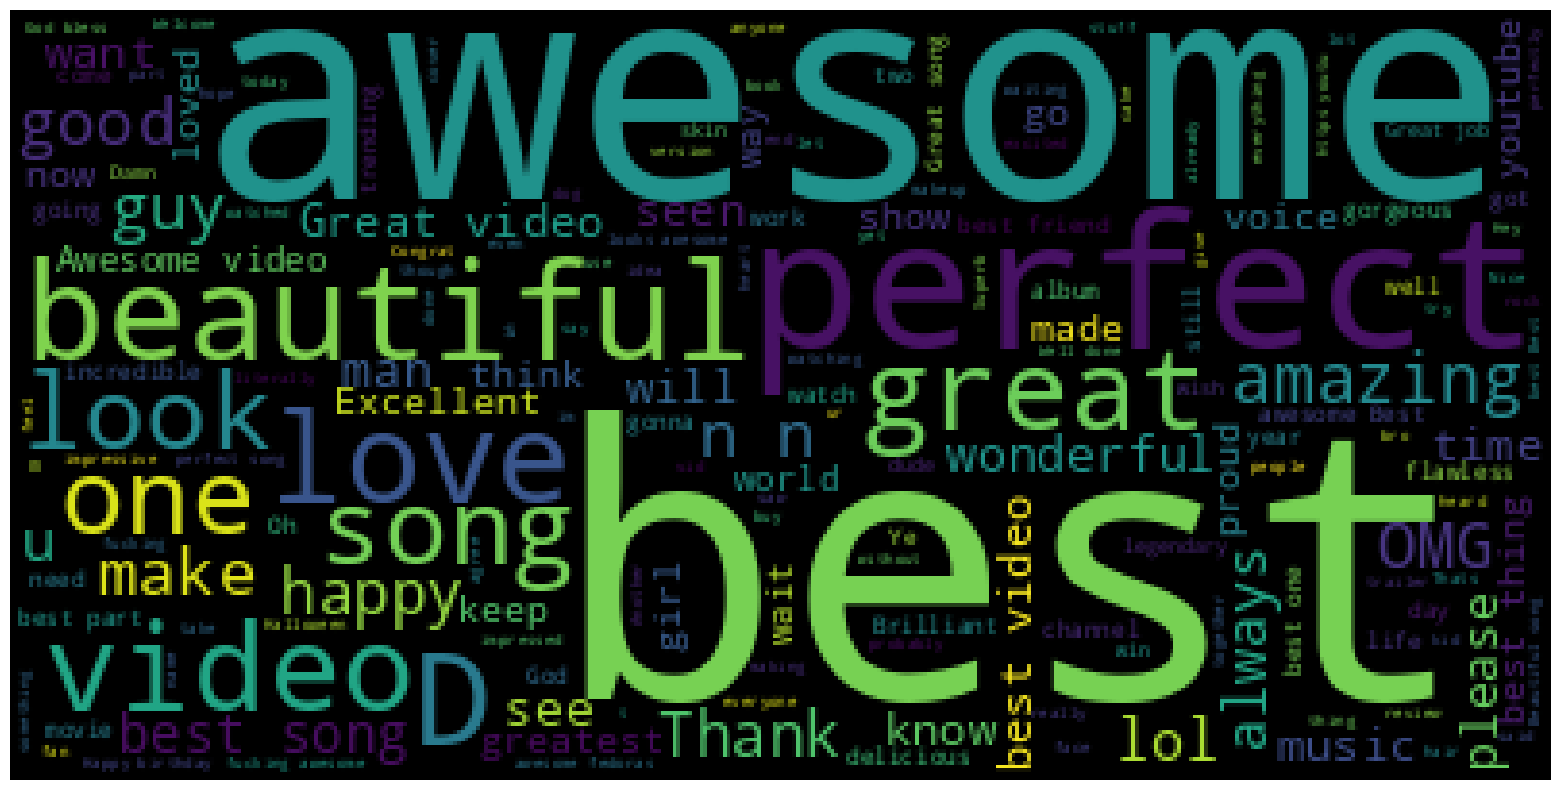

In [427]:
wordcloud=WordCloud().generate(total_comments)
plt.figure(figsize=(50,10))
plt.imshow(wordcloud)
plt.axis('off')

(-0.5, 399.5, 199.5, -0.5)

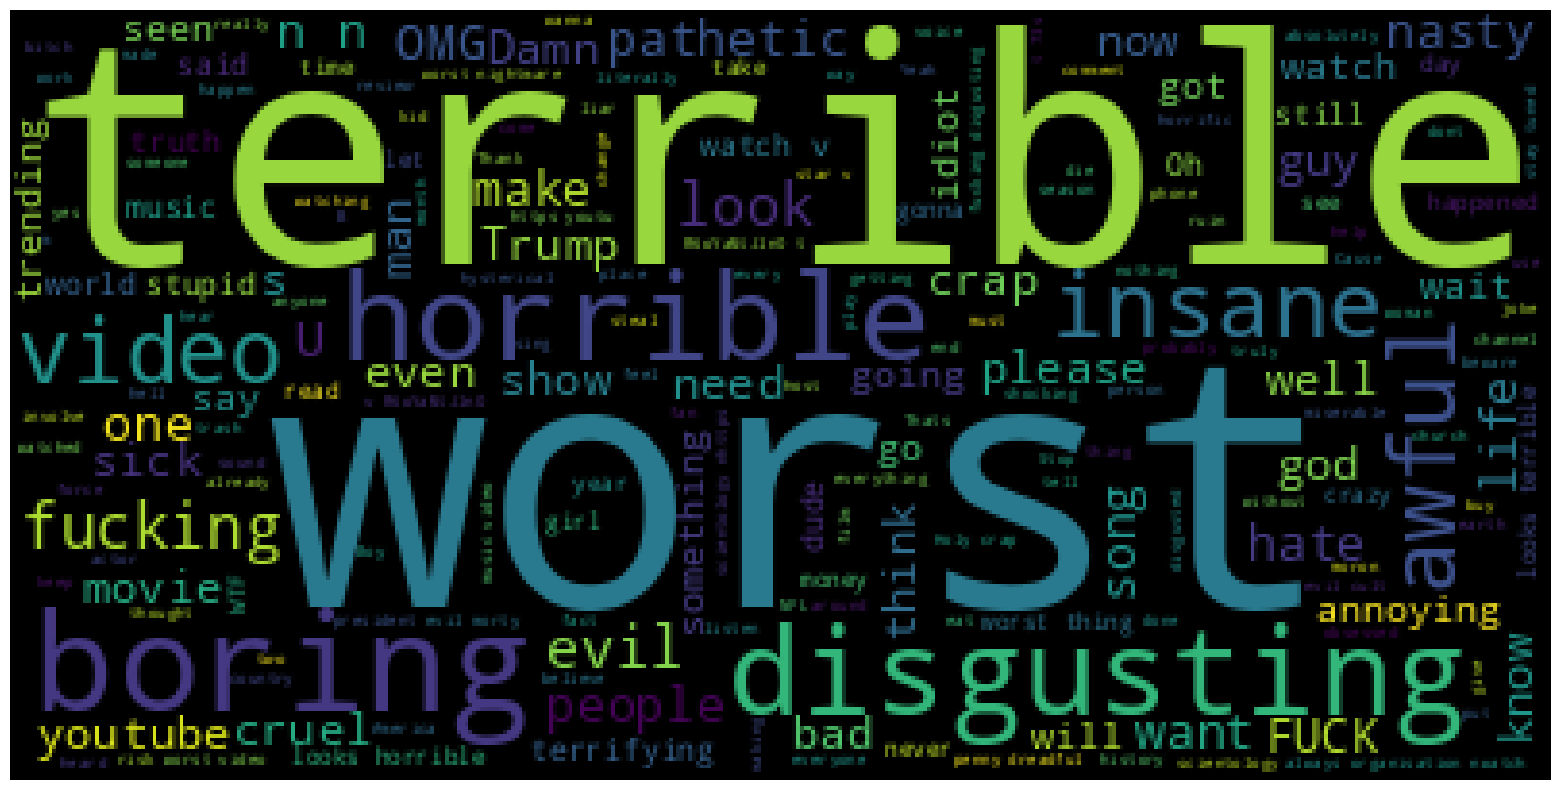

In [428]:
wordcloud=WordCloud().generate(total_comments1)
plt.figure(figsize=(50,10))
plt.imshow(wordcloud)
plt.axis('off')

### The findings could potentially provide insights into consumer behavior and help businesses and content creators tailor their strategies accordingly.

# What are the major takeaways?
### Some key learnings are:
1.	Identifying the most popular video categories on the network, which could help content creators decide what types of videos to create.
2.	Understanding the peak hours for different types of videos allows content creators to adjust the timing of their uploads for maximum reach and interaction.
3.	Identifying new content opportunities and gaining insights into emerging trends.

4.	Understanding user engagement data like watch time, likes, and comments can help you optimize your content and increase audience retention.


#                                    Thank you